# Hansard Text Analysis (Sample)

This notebook demonstrates a small-scale, reproducible analysis of Australian Parliamentary Hansard transcripts, focusing on differences between parliamentary chambers.

The analysis focuses on speech volume and high-frequency vocabulary as a first exploratory comparison between the House of Representatives and the Senate.

## Setup

In [12]:
import sys
from pathlib import Path
import pandas as pd

# --- robust project root discovery ---
def find_project_root(start: Path) -> Path:
    p = start
    for _ in range(10):
        if (p / "src").exists() and (p / "data").exists():
            return p
        p = p.parent
    raise RuntimeError("Project root not found")

ROOT = find_project_root(Path().resolve())

# ensure project root is on Python path
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

DATA = ROOT / "data" / "processed" / "hansard_sample.csv"

print("Project root:", ROOT)
print("CSV exists:", DATA.exists())


Project root: C:\Users\willi\Documents\Project\hansard-text-workflow
CSV exists: True


## Load Processed Data

We load a pre-processed CSV file containing extracted text and normalized metadata.

In [13]:
from pathlib import Path

def find_project_root(start: Path) -> Path:
    p = start
    for _ in range(10):
        if (p / "data").exists() and (p / "src").exists():
            return p
        p = p.parent
    raise RuntimeError("Project root not found")

ROOT = find_project_root(Path().resolve())
DATA = ROOT / "data" / "processed" / "hansard_sample.csv"

print("ROOT:", ROOT)
print("DATA exists:", DATA.exists())
df = pd.read_csv(DATA)
df.head(2)

ROOT: C:\Users\willi\Documents\Project\hansard-text-workflow
DATA exists: True


,doc_id,date,chamber,source_file,text,text_length,processing_version
0,House of Representatives_2025_02_10_Official,2025-02-10,House,House of Representatives_2025_02_10_Official.xml,"2025-02-10 2 1 0 House of Reps 0 0 Monday, 10 ...",200004,v1.0
1,House of Representatives_2025_02_11_Official,2025-02-11,House,House of Representatives_2025_02_11_Official.xml,"2025-02-11 2 1 0 House of Reps 0 0 Tuesday, 11...",200004,v1.0


## Metadata Enrichment

We enrich each document with basic text statistics to support descriptive analysis.

In [14]:
from src.metadata_model import enrich_metadata

df2 = enrich_metadata(df)
df2[["doc_id", "date", "chamber", "n_words", "n_chars"]].head()

,doc_id,date,chamber,n_words,n_chars
0,House of Representatives_2025_02_10_Official,2025-02-10,House,30140,200004
1,House of Representatives_2025_02_11_Official,2025-02-11,House,33998,200004
2,House of Representatives_2025_02_12_Official,2025-02-12,House,33375,200004
3,House of Representatives_2025_02_13_Official,2025-02-13,House,33071,200004
4,Senate_2025_02_10_Official,2025-02-10,Senate,33229,200004


## Top terms

In [15]:
from src.basic_analysis import top_terms

top_terms(df2["text"], n=20)

[('they', 1636),
 ('have', 1529),
 ('government', 1400),
 ('australia', 1181),
 ('you', 1135),
 ('senator', 1087),
 ('not', 1083),
 ('minister', 1038),
 ('will', 995),
 ('their', 970),
 ('has', 956),
 ('our', 909),
 ('bill', 816),
 ('but', 754),
 ('australian', 750),
 ('what', 697),
 ('about', 694),
 ('who', 688),
 ('there', 664),
 ('people', 655)]

The most frequent terms reflect formal parliamentary language (e.g. references to government, ministers, and legislation), indicating that text extraction and preprocessing are reliable.


## Speech Volume by Chamber

We first compare the total and average number of spoken words per sitting day between the House of Representatives and the Senate.

In [16]:
from src.basic_analysis import chamber_summary

chamber_summary(df2)

,chamber,docs,total_words,avg_words
0,House,4,130584,32646.0
1,Senate,4,132888,33222.0


Simple plot (word counts per chamber)

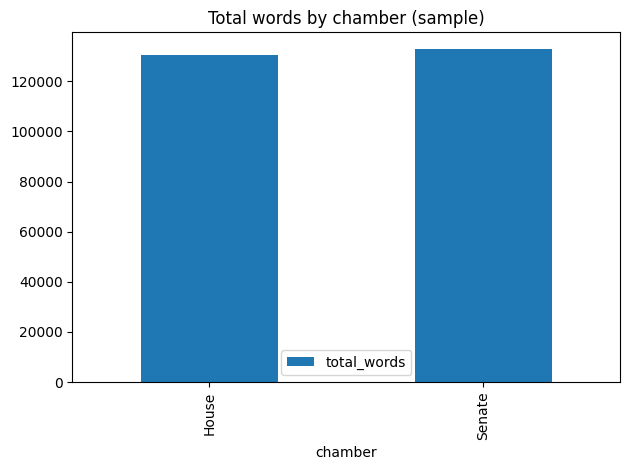

In [17]:
import matplotlib.pyplot as plt

summary = chamber_summary(df2)
summary.plot(x="chamber", y="total_words", kind="bar")
plt.title("Total words by chamber (sample)")
plt.tight_layout()
plt.show()


In this sample, Senate sittings contain slightly more spoken words per day than House sittings, though the difference is small and sample-limited.


## Limitations and Next Steps

This analysis is based on a small, non-representative sample and is intended as a reproducible demonstration rather than a definitive study.

Future extensions could include:
- TF-IDF–based keyword comparisons between chambers
- Analysis across a longer time span
- Speaker- or role-level language comparisons
